<a href="https://colab.research.google.com/github/randelln/FoodRec/blob/main/OwnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)


Mounted at /content/gdrive


In [ ]:
#import required libraries
import numpy as np
import os 
import keras
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

In [ ]:
#!unzip -q "/content/gdrive/MyDrive/UECFOOD/UEC.zip" -d "/content/UEC"

In [ ]:
import torch
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
#Set variables: file path, image sizes, and batch size
img_height, img_width = 150,150
train_data_dir = '/content/UEC'
validation_data_dir = '/content/UEC'
batch_size =16

In [ ]:
#Data Augmentation
#fill_mode - When shifting an image, there is space left over, fill_mode will fill that area
datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range =0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range =40,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [ ]:
#Setup for trainig set
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size = batch_size,
    subset="training",
    class_mode = 'categorical')

Found 9847 images belonging to 85 classes.


In [ ]:
#Setup for validation set
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size = batch_size,
    #Shuffle to be commented out when training data, and set to false when genereating metrics
    shuffle = False,
    subset="validation",
    class_mode = 'categorical',
    )

Found 2424 images belonging to 85 classes.


In [ ]:
# Activation Function - Applied to convoluted values to increase the non-linearrity
# Pooling Layer - Used to reduce image size, and only keeps most important features of image
# Flatten - Transfroms multiple feature maps, into 1D Array
# Batch Normalization - Used to increased training speed and network performance
# Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

#Apply Model
model = tf.keras.models.Sequential()

#Using a relu activation function (cost function)
#First visible layer, with 16 filters
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding="same",input_shape=(150,150,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#A second convolutional layer with 32 filters
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#A second convolutional layer with 64 filters
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#A second convolutional layer with 128 filters
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


#Fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(85))
model.add(tf.keras.layers.Activation("softmax"))

In [ ]:
model.summary()

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics = ['categorical_accuracy'])

In [ ]:
from keras.callbacks import History
from keras.callbacks import EarlyStopping


#Checkpoint used to save the best model throughout the epochs
#Using a csv logger to track epochs
checkpointer = ModelCheckpoint(filepath="/content/gdrive/MyDrive/UECMODEL2/best_model.hdf5", verbose=1, save_best_only=True)
csv_logger = CSVLogger('/content/gdrive/MyDrive/UECMODEL2/history_3class.log')
history = History()

In [ ]:
#Fitting the model(Training the model)
hist = model.fit(
    train_generator,
    shuffle = True,
    steps_per_epoch = 614,
    epochs = 75,callbacks=[history, checkpointer, csv_logger],
    validation_data = validation_generator,
    validation_steps= 150)

Epoch 1/75
614/614 [==============================] - 139s 177ms/step - loss: 4.7282 - categorical_accuracy: 0.0880 - val_loss: 4.3062 - val_categorical_accuracy: 0.1408

Epoch 00001: val_loss improved from inf to 4.30624, saving model to /content/gdrive/MyDrive/UECMODEL2/best_model.hdf5
Epoch 2/75
614/614 [==============================] - 109s 178ms/step - loss: 3.9297 - categorical_accuracy: 0.1455 - val_loss: 3.7333 - val_categorical_accuracy: 0.1708

Epoch 00002: val_loss improved from 4.30624 to 3.73333, saving model to /content/gdrive/MyDrive/UECMODEL2/best_model.hdf5
Epoch 3/75
614/614 [==============================] - 109s 178ms/step - loss: 3.5496 - categorical_accuracy: 0.1958 - val_loss: 3.9429 - val_categorical_accuracy: 0.1863

Epoch 00003: val_loss did not improve from 3.73333
Epoch 4/75
614/614 [==============================] - 109s 178ms/step - loss: 3.2459 - categorical_accuracy: 0.2318 - val_loss: 4.7949 - val_categorical_accuracy: 0.1471

Epoch 00004: val_loss did

In [ ]:
#Model accuracy calculation
acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose = 2)
print('%.2f'%(acc[1]*100))

152/152 - 16s - loss: 1.9567 - categorical_accuracy: 0.5586
55.86


In [ ]:
model.save('/content/gdrive/MyDrive/UECMODEL2/own_model.hdf5')

In [ ]:
tf.saved_model.save(model, '/content/gdrive/MyDrive/UECMODEL2')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/UECMODEL/assets


<function matplotlib.pyplot.show>

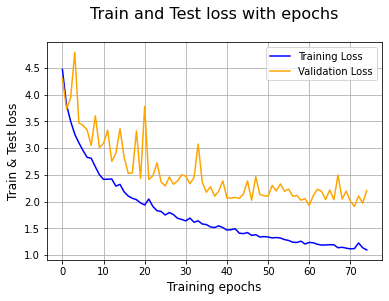

<Figure size 432x288 with 0 Axes>

In [ ]:
#PLotting loss
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], color = 'blue', label = 'Training Loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Validation Loss')
plt.grid(True)
plt.title("Train and Test loss with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test loss", fontsize=12)
plt.legend(loc=0)
plt.figure()
plt.show

In [ ]:
#plotting the accuracy 
import matplotlib.pyplot as plt

plt.plot(hist.history['categorical_accuracy'], color = 'blue', label = 'Training Accuracy')
plt.plot(hist.history['val_categorical_accuracy'], color = 'orange', label = 'Validation Accuracy')
plt.grid(True)
plt.title("Train and Test Accuracy with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test Accuracy", fontsize=12)
plt.legend(loc=0)
plt.figure()
plt.show

In [ ]:
#Names of classes, to be used for confusion matrix and classification report
target_names = [ 'rice', 
                'tempura bowl',
                'bibimbap',
                'toast',
                'croissant',
                'roll bread',
                'rasin bread','chip butty','hamburger','pizza','sandwiches','eels on rice','udon noodle','tempura udon','soba noodle','ramen noodle','beef noodle','tensin noodle','fried noodle',
                    'spaghetti',
                    'Japanese-style pancake',
                    'takoyako',
                    'pilaf',
                    'gratin',
                    'sauteed vegetables',
                    'croquette',
                    'grilled eggplant',
                    'sauteed spinach',
                    'vegetable tempura',
                    'miso soup',
                    'potage',
                    'sausage',
                    'oden',
                    'chicken and egg on rice',
                    'omelet',
                    'ganmodoki',
                    'jiaozi',
                    'stew',
                    'teriyaki grilled fish',
                    'fried fish',
                    'grilled salmon',
                    'salmon meuniere',
                    'sashimi',
                    'grilled pacific saury',
                    'pork cutlet on rice',
                    'sukiyaki',
                    'sweet and sour pork',
                    'lightly roasted fish',
                    'steamed egg hotchpotch',
                    'tempura',
                    'fried chicken',
                    'sirloin cutlet',
                    'nanbanzuke',
                    'boiled fish',
                    'seasoned beef with potatoes',
                    'beef curry',
                    'hambarg steak',
                    'steak',
                    'dried fish',
                    'ginger pork saute',
                    'spicy chili-flavoured tofu',
                    'yakitori',
                    'cabbage roll',
                    'omelet',
                    'egg sunny-side up',
                    'natto',
                    'sushi',
                    'cold tofu',
                    'egg roll',
                    'chilled noodle',
                    'stir-fried beef and peppers',
                    'simmered pork',
                    'boiled chicken and vegetables',
                    'sashimi bowl',
                    'sushi bowl',
                    'fish-shaped pancake with bean jam',
                    'shrimp with chilli sauce',
                    'chicken rice',
                    'roast chicken',
                    'steamed meat dumpling',
                    'omelet with fried rice',
                    'cutlet curry',
                    'spaghetti meat sauce',
                    'fried shrimp',
                    'fried rice']



In [ ]:
#Produce classification report for F1 scores
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(validation_generator, 2424)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[109   0   0 ...   0   0   1]
 [  1  12   0 ...   0   0   1]
 [  0   0  16 ...   0   0   0]
 ...
 [  0   0   0 ...  13   0   1]
 [  0   0   0 ...   0   8   0]
 [  2   0   0 ...   0   0  21]]
Classification Report
                                   precision    recall  f1-score   support

                             rice       0.78      0.88      0.83       124
                     tempura bowl       0.63      0.44      0.52        27
                         bibimbap       0.76      0.73      0.74        22
                            toast       0.49      0.40      0.44        43
                        croissant       0.49      0.71      0.58        24
                       roll bread       0.42      0.81      0.56        21
                      rasin bread       0.71      0.60      0.65        20
                       chip butty       0.26      0.48      0.34        29
                        hamburger       0.52      0.74      0.61        46
                  

In [ ]:
#Load model to produce predictions and metrics, after loading, then load data and perform necessary augmentation.
model = load_model('/content/gdrive/MyDrive/UECMODEL2/own_model.hdf5')

In [ ]:
#Generate and plot confustion matrix
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.pyplot import figure

figure(figsize=(70, 70))

Y_pred = model.predict(validation_generator, 2424)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)


plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
#plt.margins(0.9)

plt.subplots_adjust(bottom = 0.15)
plt.xticks([],  target_names)
plt.yticks([], target_names)
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()